# Iris classification
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE787: Machine learning, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

--2019-12-20 12:52:43--  https://jonghank.github.io/ee787/files/iris.csv
Resolving jonghank.github.io (jonghank.github.io)... 185.199.109.153, 185.199.111.153, 185.199.108.153, ...
Connecting to jonghank.github.io (jonghank.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 

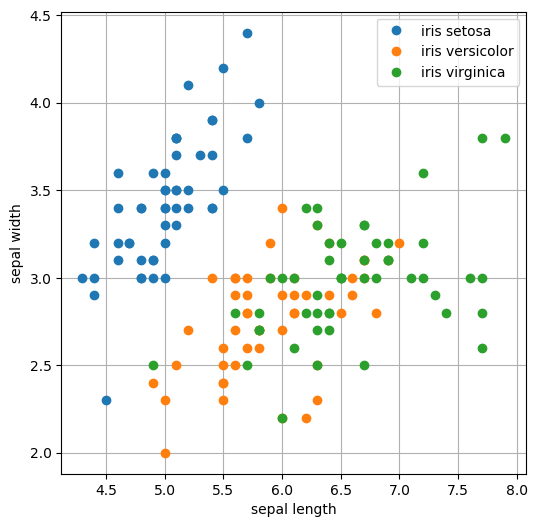

200 OK
Length: 2614 (2.6K) [text/csv]
Saving to: ‘/tmp/juliazE6WOK’

     0K ..                                                    100% 25.2M=0s

2019-12-20 12:52:43 (25.2 MB/s) - ‘/tmp/juliazE6WOK’ saved [2614/2614]



In [1]:
using CSV, DataFrames, Convex, ECOS, PyPlot

function to_one_hot(u)
    idx_to_category = unique(u)
    category_to_idx = Dict(idx_to_category[i] => i for i = 1:length(idx_to_category))
    X_one_hot = zeros(length(u), length(idx_to_category))

    for i = 1:length(u)
        X_one_hot[i, category_to_idx[u[i]]] = 1
    end

    return X_one_hot
end

datatypes = Dict(1=>Float64, 2=>Float64, 3=>Float64, 4=>Float64, 5=>Int8)
#irisdata = CSV.read("iris.csv", delim=',', types=datatypes)
irisdata = CSV.read(download("https://jonghank.github.io/ee787/files/iris.csv"), delim=',', types=datatypes)

U = irisdata[:, 1:end-1]
v = irisdata[:, end] .+ 1

figure(figsize=(6,6), dpi=100)
plot(U[v.==1,1], U[v.==1,2], "o", label="iris setosa")
plot(U[v.==2,1], U[v.==2,2], "o", label="iris versicolor")
plot(U[v.==3,1], U[v.==3,2], "o", label="iris virginica")
xlabel("sepal length")
ylabel("sepal width")
legend()
grid()

In [2]:
n,d = size(U)

X = ones(n);
for i=1:4
    X = [X U[:,i]]
end
#X = [X U[:,1].*U[:,3]]
#X = [X U[:,1].*U[:,4]]
#X = [X U[:,3].*U[:,4]]

y = to_one_hot(v)

d = size(X,2)
K = size(y,2)
m = K

theta = Variable(d,m)

yhat1 = X[v.==1,:]*theta
yhat2 = X[v.==2,:]*theta
yhat3 = X[v.==3,:]*theta

M21 = yhat1[:,2] - yhat1[:,1] 
M31 = yhat1[:,3] - yhat1[:,1]
M32 = yhat2[:,3] - yhat2[:,2] 
M12 = yhat2[:,1] - yhat2[:,2]
M13 = yhat3[:,1] - yhat3[:,3]
M23 = yhat3[:,2] - yhat3[:,3]

# hinge loss
cost  = sum( max( pos(1 + M21) , pos(1 + M31) ) );
cost += sum( max( pos(1 + M32) , pos(1 + M12) ) );
cost += sum( max( pos(1 + M13) , pos(1 + M23) ) );

# logistic loss
#cost  = logsumexp([zeros(50) M21 M31]);
#cost += logsumexp([zeros(50) M32 M12]);
#cost += logsumexp([zeros(50) M13 M23]);

problem = minimize(cost);
solve!(problem, ECOSSolver())
theta_opt = evaluate(theta)
 
C = zeros(K,K)
yhat = X*theta_opt
vhat = zeros(Int8, n)
for i=1:n
    maxval, vhat[i] = findmax(yhat[i,:]) 
    C[vhat[i],v[i]] += 1
end
C


ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +7.162e+00  +1.651e+02  +2e+03  8e-01  3e+00  1e+00  2e+00    ---    ---    1  2  - |  -  - 
 1  +3.179e+01  +1.035e+02  +1e+03  2e-01  1e+00  2e+00  2e+00  0.5200  3e-01   1  1  1 |  0  0
 2  +3.247e+01  +5.969e+01  +6e+02  7e-02  5e-01  2e+00  7e-01  0.6110  1e-01   2  0  1 |  0  0
 3  +2.097e+01  +3.410e+01  +3e+02  3e-02  3e-01  8e-01  3e-01  0.6044  2e-01   2  1  1 |  0  0
 4  +1.524e+01  +2.118e+01  +1e+02  1e-02  1e-01  4e-01  2e-01  0.6209  9e-02   2  1  1 |  0  0
 5  +1.324e+01  +1.731e+01  +9e+01  9e-03  1e-01  2e-01  1e-01  0.3890  1e-01   2  1  1 |  0  0
 6  +1.176e+01  +1.450e+01  +6e+01  6e-03  8e-02  1e-01  6e-02  0.5277  3e-01   1  0  1 |  0  0
 7  +1.029e+01  +1.209e+01  +3e+01  4e-03  6e-02  8e-02  4e-02  0.5161  2e-01   1  1  1 |  0  0
 8  +1.023e+01  +1.198e+01  +3e+01  4e-03  6e-

3×3 Array{Float64,2}:
 50.0   0.0   0.0
  0.0  49.0   1.0
  0.0   1.0  49.0